In [16]:
from google.colab import drive
import os
import pandas as pd            
import numpy as np             
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
import scipy.stats as stats


In [17]:
drive.mount('mydrive')      #Bridge to Google Drive

Mounted at mydrive


In [18]:
heart = pd.read_csv ('/content/mydrive/MyDrive/EDEM/heart.csv', sep=',')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Tomo como objeto de estudio la edad y el colesterol

# EDAD

In [20]:
age = heart.Age.describe()
age

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [24]:
n = age[0]
m_age = age[1]
sd_age = age[2]

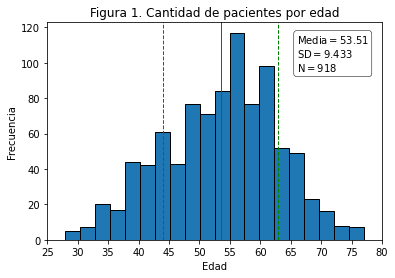

In [35]:
#Histograma de la Edad
x=heart['Age']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(25,85, step=5))
plt.title("Figura 1. Cantidad de pacientes por edad")
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{Media}=%.2f$\n$\mathrm{SD}=%.3f$\n$\mathrm{N}=%.0f$'%(m_age, sd_age, n)
plt.text (66,95, textstr , bbox=props)
plt.axvline(x=m_age, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_age-sd_age, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_age + sd_age, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')

# Presión arterial en reposo ['RestingBP']

In [62]:
hr = heart.MaxHR.describe()
hr

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [63]:
n = hr[0]
m_hr = hr[1]
sd_hr = hr[2]

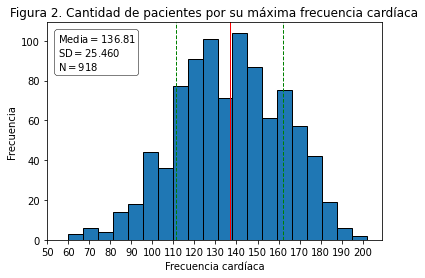

In [71]:
#Histograma de la máxima frecuencia cardíaca
x=heart['MaxHR']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(50,210, step=10))
plt.title("Figura 2. Cantidad de pacientes por su máxima frecuencia cardíaca")
plt.ylabel('Frecuencia')
plt.xlabel('Frecuencia cardíaca')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{Media}=%.2f$\n$\mathrm{SD}=%.3f$\n$\mathrm{N}=%.0f$'%(m_hr, sd_hr, n)
plt.text (55,85, textstr , bbox=props)
plt.axvline(x=m_hr, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_hr-sd_hr, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_hr + sd_hr, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')

# SCATTERPLOT

Text(0.5, 1.0, 'Figura 3.Máxima frecuencia cardíaca por edad ')

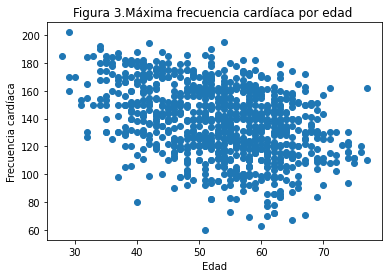

In [73]:
###################Scatterplot
###Eje x Edad; Eje y = Máxima Frecuencia Cardíaca
#Primero la variable predictora y luego la predicha
plt.scatter(heart['Age'], heart['MaxHR'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca')
plt.title("Figura 3.Máxima frecuencia cardíaca por edad ")

# CORRELACIÓN

In [74]:
from scipy.stats.stats import pearsonr

x=heart['Age']
y=heart['MaxHR']
pearsonr(x,y)

r, p_val=pearsonr(x,y)

print(r,p_val)

#necesitamos el tamaño muestral [n]
print ('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

-0.3820446750319706 2.8411217807772657e-33
r: -0.382 P.Val: 0.0 n: 918.0


As p value is lower than 0.05, we do reject the null

MaxHR do significantly differ in Age

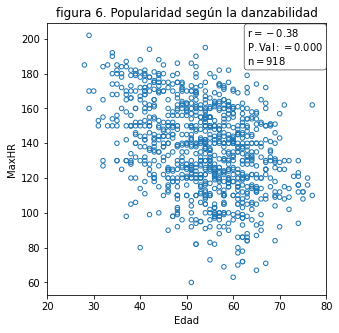

In [94]:
#Incluye el resultado de la correlacion en el plot 
plt.figure(figsize=(5,5))
plt.scatter(heart['Age'], heart['MaxHR'], s=20, facecolors='none', edgecolors='C0')
plt.xticks(np.arange(20, 90, step=10))
plt.yticks(np.arange(60, 210, step=20))
plt.title("figura 6. Popularidad según la danzabilidad")
plt.ylabel('MaxHR')
plt.xlabel('Edad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (63,185, textstr , bbox=props)
plt.show()

Comentario adicional:
Si me esperaba una r negativa, dado que la frecuencia cardíaca máxima desciende a medida que envejecemos. Sin embargo es una r con un valor absoluto menor del que realmente esperaba.

También hay que puntualizar que la persona más joven (del dataset) es de 28 años. Sabiendo que los que más actividad fisica hacen son grupos jóvenes (en su gran mayoría, menores de 20 años), el dataset se nos queda con una r baja relacionando las variables escogidas.

En conclusión, una r muy lejos de un -0.6 pero que con un dataset mas completo, se hubiera acercado más a esos valores.
